# Case Study 1 : Yelp Data Analysis

**Required Readings:** 
* [Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge) 
* Please download the Yelp dataset from the above webpage.

**NOTE**
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.


Here is an example of the data format. More details are included [here](https://www.yelp.com/dataset_challenge)

## Business Objects

Business objects contain basic information about local businesses. The fields are as follows:

```json
{
  'type': 'business',
  'business_id': (a unique identifier for this business),
  'name': (the full business name),
  'neighborhoods': (a list of neighborhood names, might be empty),
  'full_address': (localized address),
  'city': (city),
  'state': (state),
  'latitude': (latitude),
  'longitude': (longitude),
  'stars': (star rating, rounded to half-stars),
  'review_count': (review count),
  'photo_url': (photo url),
  'categories': [(localized category names)]
  'open': (is the business still open for business?),
  'schools': (nearby universities),
  'url': (yelp url)
}
```
## Checkin Objects
```json
{
    'type': 'checkin',
    'business_id': (encrypted business id),
    'checkin_info': {
        '0-0': (number of checkins from 00:00 to 01:00 on all Sundays),
        '1-0': (number of checkins from 01:00 to 02:00 on all Sundays),
        ...
        '14-4': (number of checkins from 14:00 to 15:00 on all Thursdays),
        ...
        '23-6': (number of checkins from 23:00 to 00:00 on all Saturdays)
    }, # if there was no checkin for a hour-day block it will not be in the dict
}
```

# Problem: pick a data science problem that you plan to solve using Yelp Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using yelp data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

In [ ]:
'''
It's easy for reviewers to review & rate any place or experience, 
however it is sometimes difficult for Business owners to be able to perceive important piece of feedback.
Thus if we are targeting one Business type (Restaurants) and focusing just on data related to single region (Phoenix,Arizona,USA).
We analyze all reviews related to low-rated restaurant(rating less than 3), 
and we incorporate Natural Learning Processing to pick 5 most frequent phrases from reviews that form 
review tags for the Business.
And just by seeing 5 three-word phrases, Restaurant owner understands what is being talked about his business by his customer.
This makes it easy for Restaurant Owner to improve on those areas.
'''

# Data Collection/Processing: 

### Importing Libraries

In [1]:
import pandas as pd
import json
import csv

In [ ]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

with open('business.json', 'rb') as f:
    business_data = f.readlines()

business_data = map(lambda x: x.rstrip(), business_data)
business_data_json_str = "[" + b','.join(business_data).decode() + "]"
business_data = pd.read_json(business_data_json_str)

infile = open('review.json','r')
outfile = open('review.csv','w')
writer = csv.writer(outfile)
count=0
for row in infile:
    data = json.loads(row)
    if count == 0:
        header = data.keys()
        writer.writerow(header)
        count += 1
    writer.writerow(data.values())
outfile.close()
reviewData = pd.read_csv('review.csv')

# Data Exploration: Exploring the Yelp Dataset

**(1) Finding the most popular business categories:** 
* print the top 10 most popular business categories in the dataset and their counts (i.e., how many business objects in each category). Here we say a category is "popular" if there are many business objects in this category (such as 'restaurants').

### Importing libraries

In [2]:
import operator
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Top 10 most popular Business Categories')

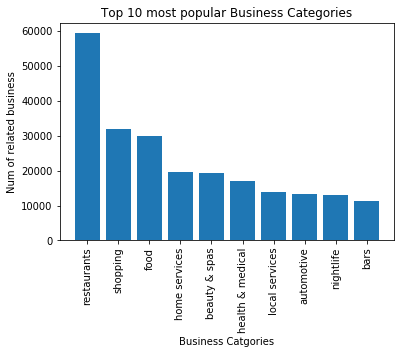

In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

categorySet = dict()
for index,b in business_data.iterrows():
    cats = []
    business_cats=b['categories']
    if business_cats != None:
        cats = b['categories'].split(',')
        for c in cats:
            c=c.strip()
            c=c.lower()
            if c not in categorySet:
                categorySet[c]=1
            else:
                v=categorySet.get(c)
                v=v+1
                categorySet[c]=v

sorted_x = sorted(categorySet.items(), key=operator.itemgetter(1),reverse=True)
sorted_Categories=sorted_x[:10]

cat_table = pd.DataFrame(sorted_Categories)
plt.bar(cat_table[0],cat_table[1])
plt.xticks(rotation=90)
plt.xlabel("Business Catgories")
plt.ylabel("Num of related business")
plt.title("Top 10 most popular Business Categories")

** (2) Find the most popular business objects** 
* print the top 10 most popular business objects in the dataset and their counts (i.e., how many checkins in total for each business object).  Here we say a business object is "popular" if the business object attracts a large number of checkins from the users.

Text(0.5, 1.0, 'Top 10 most popular Business based on their number of check-ins')

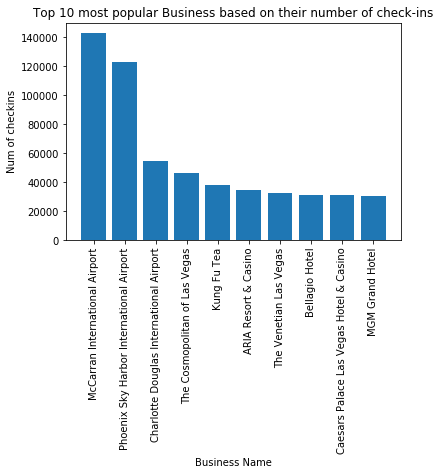

In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

with open('checkin.json', 'rb') as f:
    checkin_data = f.readlines()

checkin_data = map(lambda x: x.rstrip(), checkin_data)
checkin_data_json_str = "[" + b','.join(checkin_data).decode() + "]"
checkin_data = pd.read_json(checkin_data_json_str)

business_checkin_Data=pd.merge(checkin_data,business_data,on="business_id")
business_checkin_Data = business_checkin_Data[['business_id','name','date']]
business_checkin_Data['Number of checkins']=0

checkin=[]
for index,b in business_checkin_Data.iterrows():
    checkin_date=b['date']
    if checkin_date != None:
        dates = b['date'].split(',')
        l = len(dates)
        checkin.append(l)
business_checkin_Data['Number of checkins']=checkin

business_checkin_Data=business_checkin_Data[['business_id','name','Number of checkins']]
business_checkin_Data=business_checkin_Data.sort_values('Number of checkins',ascending=False)
business_checkin_Data = business_checkin_Data[:10]

plt.bar(business_checkin_Data['name'],business_checkin_Data['Number of checkins'])
plt.xticks(rotation=90)
plt.xlabel("Business Name")
plt.ylabel("Num of checkins")
plt.title("Top 10 most popular Business based on their number of check-ins")


# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

In [ ]:
'''
Since it is difficult for businesses to read all reviews and understand the cause of their business low rating,
we are trying to implement a sentiment anaylsis on yelp reviews for low rated Restaurants
so as to find top few reasons for the low rating and make is easy for businesses to read those quick phrases
and implement right approaches to be able to improve their rating on yelp.
'''

Write codes to implement the solution in python:

In [ ]:
Low_rated_business = business_data.loc[business_data.stars<3]

In [ ]:
Open_Low_Rated_Business = Low_rated_business.loc[Low_rated_business.is_open==1]

In [ ]:
Statewise_Businesses = Open_Low_Rated_Business.groupby(['state'])['business_id'].count()
Statewise_Businesses = pd.DataFrame(Statewise_Businesses)
Statewise_Businesses.reset_index(level=0,inplace=True)

Index(['state', 'business_id'], dtype='object')


Text(0.5, 1.0, 'Count of Low Rated Businesses in various States')

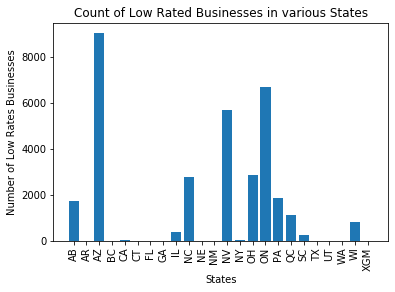

In [ ]:
print(Statewise_Businesses.columns)
plt.bar(Statewise_Businesses['state'],Statewise_Businesses['business_id'])
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Number of Low Rates Businesses")
plt.title("Count of Low Rated Businesses in various States")

In [ ]:
AZ_Businesses = Open_Low_Rated_Business.loc[Open_Low_Rated_Business.state=='AZ']

Text(0.5, 1.0, 'Count of Low Rated Businesses in various Arizona cities')

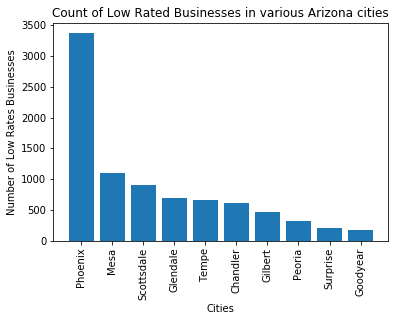

In [ ]:
Citywise_Businesses = AZ_Businesses.groupby(['city'])['business_id'].count()
Citywise_Businesses = pd.DataFrame(Citywise_Businesses)
Citywise_Businesses.reset_index(level=0,inplace=True)

Citywise_Businesses=Citywise_Businesses.sort_values('business_id',ascending=False)
Citywise_Businesses = Citywise_Businesses[:10]
Citywise_Businesses
plt.bar(Citywise_Businesses['city'],Citywise_Businesses['business_id'])
plt.xticks(rotation=90)
plt.xlabel("Cities")
plt.ylabel("Number of Low Rates Businesses")
plt.title("Count of Low Rated Businesses in various Arizona cities")

In [ ]:
Phoenix_Businesses = AZ_Businesses.loc[AZ_Businesses.city=='Phoenix']
Phoenix_Businesses

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
54,c-BELKj0SvNhBesQMf-bKw,Circle K,3101 W Northern Ave,Phoenix,AZ,85051,33.552850,-112.125975,2.5,3,1,{'BusinessAcceptsCreditCards': 'True'},"Convenience Stores, Automotive, Food, Gas Stat...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
95,BUdtUH9SkcitAf4JOOsa6A,North Mountain Medical & Rehabilitation Center,9155 N 3rd St,Phoenix,AZ,85020,33.569484,-112.068829,2.0,11,1,{'ByAppointmentOnly': 'False'},"Hospitals, Doctors, Rehabilitation Center, Med...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
136,MbGUIsOkVeKrwH3_RcGqng,Air Tech Plus,4829 N 92nd Ln,Phoenix,AZ,85037,33.508137,-112.259312,1.0,5,1,{'BusinessAcceptsCreditCards': 'True'},"Heating & Air Conditioning/HVAC, Contractors, ...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
167,YAbKZJxEtdHCWrJYj2uR3w,MovieWork Now,"11811 N Tatum Blvd, Ste 3031",Phoenix,AZ,85028,33.594688,-111.979357,2.5,19,1,{'GoodForKids': 'True'},"Arts & Entertainment, Employment Agencies, Tal...","{'Monday': '9:0-16:0', 'Tuesday': '9:0-16:0', ..."
182,zgjeunqPvj_423xkGtiFjw,MinuteClinic,1610 East Camelback Rd,Phoenix,AZ,85016,33.509595,-112.047018,2.5,7,1,None,"Medical Centers, Health & Medical, Walk-in Cli...","{'Monday': '14:30-19:30', 'Tuesday': '14:30-19..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192428,3xI0ToitrAJkrUSH4gbmCA,Subway,"4747 E Elliot Rd, Ste 33",Phoenix,AZ,85044,33.347499,-111.981221,2.0,14,1,"{'RestaurantsDelivery': 'False', 'GoodForKids'...","Restaurants, Sandwiches, Fast Food",None
192485,1oTsr0b56-CiItIYOu4B4w,Alphagraphics,3525 N Central Ave,Phoenix,AZ,85012,33.489506,-112.073393,2.0,5,1,{'BusinessAcceptsCreditCards': 'True'},"Marketing, Local Services, Printing Services, ...","{'Monday': '8:0-19:0', 'Tuesday': '8:0-19:0', ..."
192537,ubXdEfoqGXevhuBJEfb9eg,The Arizona Car Wash Company,3240 E Shea Blvd,Phoenix,AZ,85028,33.582699,-112.011043,2.5,19,1,{'BusinessAcceptsCreditCards': 'True'},"Car Wash, Automotive",None
192561,nCcgzTaajDGgrZpFZaq8Ug,Super 8 by Wyndham Phoenix Downtown,"965 East Van Buren, 1-10 East, Take 7th St Exit",Phoenix,AZ,85006,33.450882,-112.059401,2.0,50,1,"{'RestaurantsPriceRange2': '1', 'WiFi': 'u'fre...","Hotels, Hotels & Travel, Event Planning & Serv...",None


In [ ]:
Phoenix_Business_Reviews = pd.merge(Phoenix_Businesses, reviewData, on='business_id', how='inner')
Phoenix_Business_Reviews.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,c-BELKj0SvNhBesQMf-bKw,Circle K,3101 W Northern Ave,Phoenix,AZ,85051,33.552850,-112.125975,2.5,3,...,"Convenience Stores, Automotive, Food, Gas Stat...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",uDdqhusUPG8LOwhMUkKDiA,9gZ4pQHdK6v8xMLig6EEFA,4.0,1,1,0,Convenient. I was running low on gas. I discov...,2017-07-19 21:45:00
1,c-BELKj0SvNhBesQMf-bKw,Circle K,3101 W Northern Ave,Phoenix,AZ,85051,33.552850,-112.125975,2.5,3,...,"Convenience Stores, Automotive, Food, Gas Stat...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",CW--k7S3ZmZSyF5BfeFr7w,fhKG3Ry2d199gut0Ne158A,2.0,1,0,0,"The store has nothing wrong with it, it is in ...",2016-09-12 00:27:39
2,c-BELKj0SvNhBesQMf-bKw,Circle K,3101 W Northern Ave,Phoenix,AZ,85051,33.552850,-112.125975,2.5,3,...,"Convenience Stores, Automotive, Food, Gas Stat...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",JVbXSWNHrCxEb9jAKPTIRQ,ufbjcqv4iuvfSefnHi6LjA,2.0,1,0,0,I am giving a 2 star rating because I finally ...,2018-09-20 04:23:19
3,BUdtUH9SkcitAf4JOOsa6A,North Mountain Medical & Rehabilitation Center,9155 N 3rd St,Phoenix,AZ,85020,33.569484,-112.068829,2.0,11,...,"Hospitals, Doctors, Rehabilitation Center, Med...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",9RbWYKNG7JcyJ_ReZiOd-w,eCS9AtlHIXXclGCSNabC9g,1.0,4,0,1,Having had the experience of working here for ...,2016-08-25 19:24:18
4,BUdtUH9SkcitAf4JOOsa6A,North Mountain Medical & Rehabilitation Center,9155 N 3rd St,Phoenix,AZ,85020,33.569484,-112.068829,2.0,11,...,"Hospitals, Doctors, Rehabilitation Center, Med...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",2fqd5MIGaaC_jxHLNbOjgA,TUwexsShPlf1VA2Yy2YAPA,5.0,1,0,0,My friend is a patient there. The nurses take ...,2018-05-30 21:38:37
5,BUdtUH9SkcitAf4JOOsa6A,North Mountain Medical & Rehabilitation Center,9155 N 3rd St,Phoenix,AZ,85020,33.569484,-112.068829,2.0,11,...,"Hospitals, Doctors, Rehabilitation Center, Med...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",_lZtS46LoQdHSaUVRVL5AA,s3VE7AiRQ2mCm_bDp6oqaA,1.0,3,0,0,This place is terrible. My father has been her...,2018-05-09 20:21:49
6,BUdtUH9SkcitAf4JOOsa6A,North Mountain Medical & Rehabilitation Center,9155 N 3rd St,Phoenix,AZ,85020,33.569484,-112.068829,2.0,11,...,"Hospitals, Doctors, Rehabilitation Center, Med...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",gv7wLRFzCEvcBDw4AXSzRQ,1Ukei5PJcRj3kfZDt-PYWg,1.0,0,0,0,This place does not rehab as it claims.\nThey ...,2018-09-13 01:18:53
7,BUdtUH9SkcitAf4JOOsa6A,North Mountain Medical & Rehabilitation Center,9155 N 3rd St,Phoenix,AZ,85020,33.569484,-112.068829,2.0,11,...,"Hospitals, Doctors, Rehabilitation Center, Med...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",WZYE5277iFDL6hUYu80fkw,dFVTsFPULEPe-rVl28eFyQ,1.0,5,0,0,Nurse apathy is high.\nLeft comatosed patient ...,2018-04-02 12:43:28
8,BUdtUH9SkcitAf4JOOsa6A,North Mountain Medical & Rehabilitation Center,9155 N 3rd St,Phoenix,AZ,85020,33.569484,-112.068829,2.0,11,...,"Hospitals, Doctors, Rehabilitation Center, Med...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",sq1SEjlzfsYrDWMipkDb1w,Z13mL--13DD4N_DnP1wDAQ,1.0,7,0,0,I went to visit a friend at North Mountain Med...,2017-10-18 13:01:33
9,BUdtUH9SkcitAf4JOOsa6A,North Mountain Medical & Rehabilitation Center,9155 N 3rd St,Phoenix,AZ,85020,33.569484,-112.068829,2.0,11,...,"Hospitals, Doctors, Rehabilitation Center, Med...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",kjSnmBfX7GnQBpjsv9FEFQ,vW0E6s_HMv5qNrDfxYSYVA,1.0,8,0,0,My father has been here for a couple weeks aft...,2015-11-10 02:52:01


In [ ]:
rest_array=[]
for i in range(len(Phoenix_Business_Reviews)):
    cat = Phoenix_Business_Reviews['categories'][i]
    if cat!=None:
        cat = cat.lower()
        if 'restaurants' in cat:
            rest_array.append(i)
rest_array

PhoenixRestaurantReviews = Phoenix_Business_Reviews.iloc[rest_array]
PhoenixRestaurantReviews

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
79,e-9f6vasnWh3z0uOq287Aw,Pizza Hut,"2835 N 16th St, Ste 103",Phoenix,AZ,85006,33.479506,-112.046931,2.0,14,...,"Restaurants, Italian, Pizza, Fast Food, Chicke...",None,-TFgwNHgIveQp0dU4WqOUQ,Dt3OuFQ7cAvCvXEb7YvW_Q,1.0,0,0,0,Lack of customer service made a slitely annoyi...,2015-08-30 21:54:45
80,e-9f6vasnWh3z0uOq287Aw,Pizza Hut,"2835 N 16th St, Ste 103",Phoenix,AZ,85006,33.479506,-112.046931,2.0,14,...,"Restaurants, Italian, Pizza, Fast Food, Chicke...",None,jOmz__ywk_1bSpdDseWt5A,SvLr_Zt_s7Qi74FUg1-zTQ,3.0,0,0,0,I've gone thru this pizza hut for the most par...,2017-03-05 01:46:12
81,e-9f6vasnWh3z0uOq287Aw,Pizza Hut,"2835 N 16th St, Ste 103",Phoenix,AZ,85006,33.479506,-112.046931,2.0,14,...,"Restaurants, Italian, Pizza, Fast Food, Chicke...",None,vF_6StBXlwru7BbNfhucNg,oMv45EQ2w56aIC2evsuamw,1.0,0,0,0,"I am disappointed, though judging by previous ...",2017-11-22 06:04:27
82,e-9f6vasnWh3z0uOq287Aw,Pizza Hut,"2835 N 16th St, Ste 103",Phoenix,AZ,85006,33.479506,-112.046931,2.0,14,...,"Restaurants, Italian, Pizza, Fast Food, Chicke...",None,rZl_xqAE0kotzAfEuXNf-Q,XT2PFiGrgNwB5ZmgbJlelw,1.0,5,4,5,"About once a week, the husband convinces me th...",2008-06-04 16:07:06
83,e-9f6vasnWh3z0uOq287Aw,Pizza Hut,"2835 N 16th St, Ste 103",Phoenix,AZ,85006,33.479506,-112.046931,2.0,14,...,"Restaurants, Italian, Pizza, Fast Food, Chicke...",None,S7Mse6yDpZhULL6pc0eUBQ,xgVzDZ8jgRDnx3pUvgOhuA,1.0,1,0,0,This place has a low rating for a good reason....,2017-02-12 03:02:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72629,3xI0ToitrAJkrUSH4gbmCA,Subway,"4747 E Elliot Rd, Ste 33",Phoenix,AZ,85044,33.347499,-111.981221,2.0,14,...,"Restaurants, Sandwiches, Fast Food",None,JQLEOzSnXRLpSo0VjSeQpw,MWumH5gX6b9gNqiX3lwptQ,1.0,0,0,0,If I could give 0 stars I would. \nAbsolutely ...,2018-11-06 01:55:23
72630,3xI0ToitrAJkrUSH4gbmCA,Subway,"4747 E Elliot Rd, Ste 33",Phoenix,AZ,85044,33.347499,-111.981221,2.0,14,...,"Restaurants, Sandwiches, Fast Food",None,VZU8hcSDYO2WU3_AHZO6bQ,VFm_ZLiPZVDtUomT-znxmA,1.0,1,0,0,This particular Subway is just about as low as...,2018-03-10 05:47:09
72631,3xI0ToitrAJkrUSH4gbmCA,Subway,"4747 E Elliot Rd, Ste 33",Phoenix,AZ,85044,33.347499,-111.981221,2.0,14,...,"Restaurants, Sandwiches, Fast Food",None,31Or0tY9GvXApeIovNTpwQ,60eXlW3PwzEai8RHex6LfA,1.0,3,0,0,The manager here is a complete bitch. The kid ...,2014-09-01 19:53:50
72632,3xI0ToitrAJkrUSH4gbmCA,Subway,"4747 E Elliot Rd, Ste 33",Phoenix,AZ,85044,33.347499,-111.981221,2.0,14,...,"Restaurants, Sandwiches, Fast Food",None,BOM0UHgL5660rs-RXCU7mg,zvcVvZbfhV_cTI6ZfzHcLA,2.0,2,0,0,When I walked in the server (sandwich maker) j...,2014-10-20 02:06:23


In [ ]:
business_Review = PhoenixRestaurantReviews.groupby(['business_id']).text.unique().agg(' '.join).reset_index()
business_Review['Most_Frequent_Tags'] = ''

### Importing Libraries

In [ ]:
import re
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords

nltk.download('punkt')
from nltk.tokenize import punkt, word_tokenize

from nltk.stem.porter import PorterStemmer 
from nltk.util import ngrams 

In [ ]:
for i in range(0, len(business_Review)):  
      
    review = re.sub('[^a-zA-Z]', ' ', business_Review.text[i])
    review = review.lower()  
    review = review.split()  
      
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]  

    review = ' '.join(review)   
    tokens = nltk.word_tokenize(review)
    trigrm = nltk.trigrams(tokens)
    trigrmLst = [' '.join(t) for t in trigrm]
    
    freq = 0
    tag_freq = {}
    for j in trigrmLst:
        if j in tag_freq:
            tag_freq[j] +=1
        else:
            tag_freq[j] = 1

    popular_tags = sorted(tag_freq, key = tag_freq.get, reverse = True)

    top_10 = popular_tags[:10]
    topTags = [''.join(h) for h in top_10]
    topTagStr=';'.join(topTags)
    business_Review['Most_Frequent_Tags'][i] = topTagStr

business_Review.to_csv('Business_review.csv',index=False)

[nltk_data] Downloading package stopwords to /home/arpit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/arpit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


### Importing Libraries

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

review = re.sub('[^a-zA-Z]', ' ', business_Review.text[9])
review = review.lower()  
review = review.split()  
      
ps = PorterStemmer()
review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]  

review = ' '.join(review)   
tokens = nltk.word_tokenize(review)
trigrm = nltk.trigrams(tokens)
trigrmLst = [' '.join(t) for t in trigrm]
trigrmLst
frequency = 0
tag_frequency = {}
for j in trigrmLst:
        if j in tag_frequency:
            tag_frequency[j] +=1
        else:
            tag_frequency[j] = 1
            
            
tag_frequency

wordcloud.generate_from_frequencies(tag_frequency)
plt.title('Most frequently occurring trigrams connected with an underscore_')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

*-----------------
# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 7 minutes' talk) to present about the case study . Each team present their case studies in class for 7 minutes.

Please compress all the files in a zipped file.


**How to submit:**

        Please submit through Canvas, in the Assignment "Case Study 1".
        
**Note: Each team only needs to submit one submission in Canvas**